In [1]:
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados_conexao = (
    "Driver={SQL Server};"
    "Server=DESKTOP-2K9QLKU\SQLSERVER;"
    "Database=AdventureWorksDW2022;"
)
conexao = pyodbc.connect(dados_conexao)
print("Conexao bem sucedida")

<>:8: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\S'
C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_73144\3876299519.py:8: SyntaxWarning: invalid escape sequence '\S'
  "Server=DESKTOP-2K9QLKU\SQLSERVER;"


Conexao bem sucedida


In [2]:
codigo_sql = """
SELECT TOP 10
    dp.EnglishProductName AS Nome_Produto,   
    SUM(fis.OrderQuantity) AS Qtd_Vendas, 
    ROUND(SUM(fis.SalesAmount), 2) AS Valor_Total,
    ROUND(SUM(fis.SalesAmount - fis.TotalProductCost), 2) AS Lucro_Gerado 
FROM
    FactInternetSales AS fis
INNER JOIN DimProduct AS dp
    ON fis.ProductKey = dp.ProductKey    
INNER JOIN DimProductSubcategory AS dps
    ON dp.ProductSubcategoryKey = dps.ProductSubcategoryKey  
INNER JOIN DimProductCategory AS dpc
    ON dps.ProductCategoryKey = dpc.ProductCategoryKey  
WHERE 
    dpc.EnglishProductCategoryName = 'Bikes' 
    AND fis.OrderDate <= '20140128' 
GROUP BY
    dp.EnglishProductName  
ORDER BY
    Qtd_Vendas DESC;
"""
dados = pd.read_sql(codigo_sql, conexao)
conexao.close()

C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_73144\948656214.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dados = pd.read_sql(codigo_sql, conexao)


In [3]:

print(dados.head())

              Nome_Produto  Qtd_Vendas  Valor_Total  Lucro_Gerado
0   Mountain-200 Black, 46         620   1373469.55     626621.57
1   Mountain-200 Black, 42         614   1363142.09     621759.61
2  Mountain-200 Silver, 38         596   1339462.79     610864.43
3   Mountain-200 Black, 38         582   1294866.14     590477.46
4  Mountain-200 Silver, 46         580   1301100.10     593490.47


C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_73144\1132096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Nome_Produto', y='Qtd_Vendas', data=dados, palette='Blues_d')
C:\Users\ANTONIO NETO\AppData\Local\Temp\ipykernel_73144\1132096.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper left')


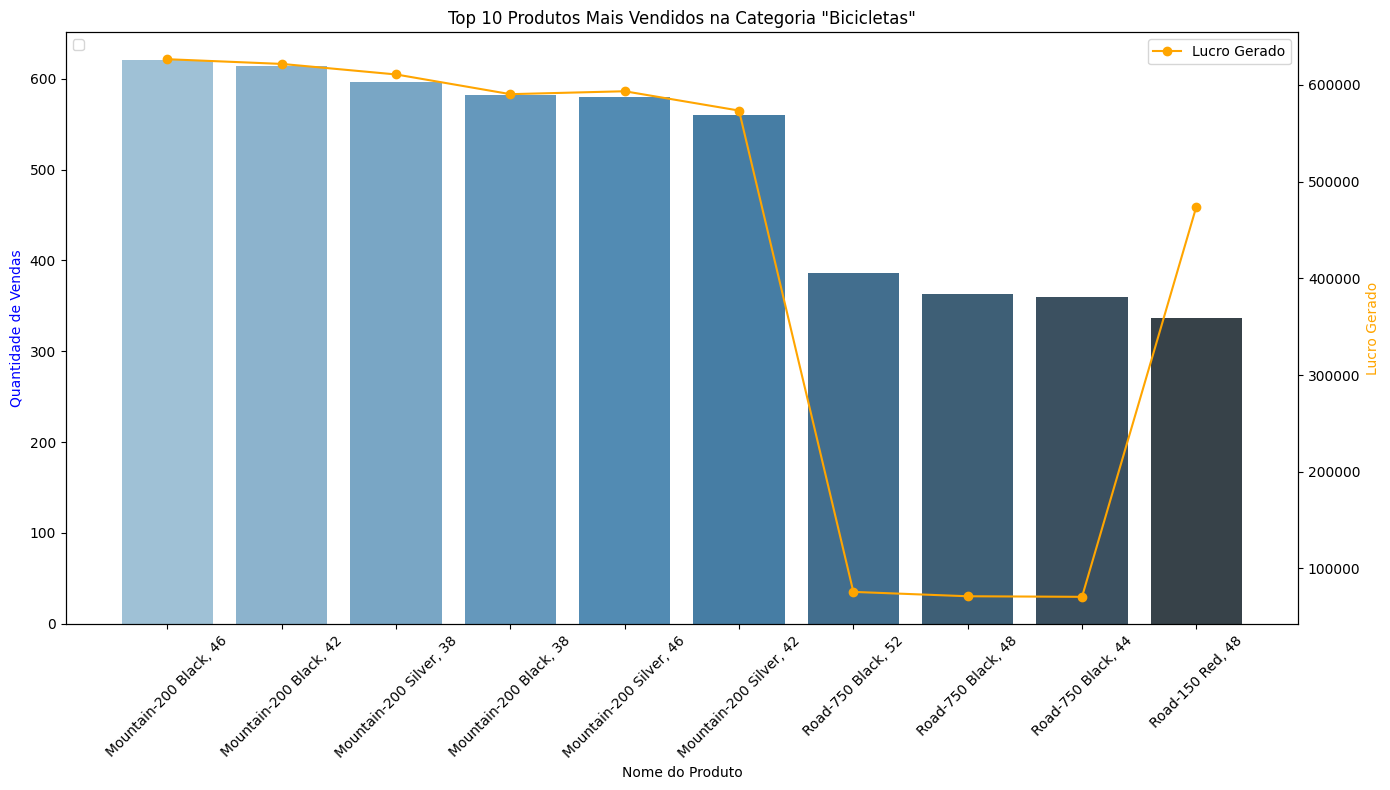

In [4]:
plt.figure(figsize=(14, 8))

ax1 = sns.barplot(x='Nome_Produto', y='Qtd_Vendas', data=dados, palette='Blues_d')
ax1.set_xlabel('Nome do Produto')
ax1.set_ylabel('Quantidade de Vendas', color='blue')
ax1.set_title('Top 10 Produtos Mais Vendidos na Categoria "Bicicletas"')

ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
ax2.plot(dados['Nome_Produto'], dados['Lucro_Gerado'], color='orange', marker='o', linestyle='-', label='Lucro Gerado')
ax2.set_ylabel('Lucro Gerado', color='orange')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()